In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

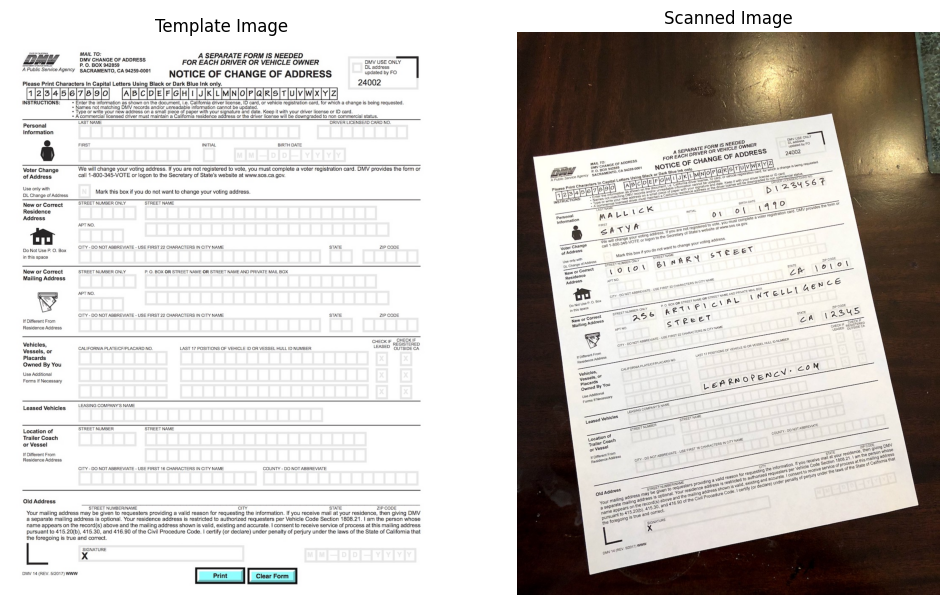

In [3]:
templateImg = cv2.imread("form.jpg", cv2.IMREAD_COLOR)[:,:,::-1]
scanImg = cv2.imread("scanned-form.jpg", 1)[:,:,::-1]

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(templateImg)
plt.title("Template Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(scanImg)
plt.title("Scanned Image")
plt.axis("off")
plt.show()

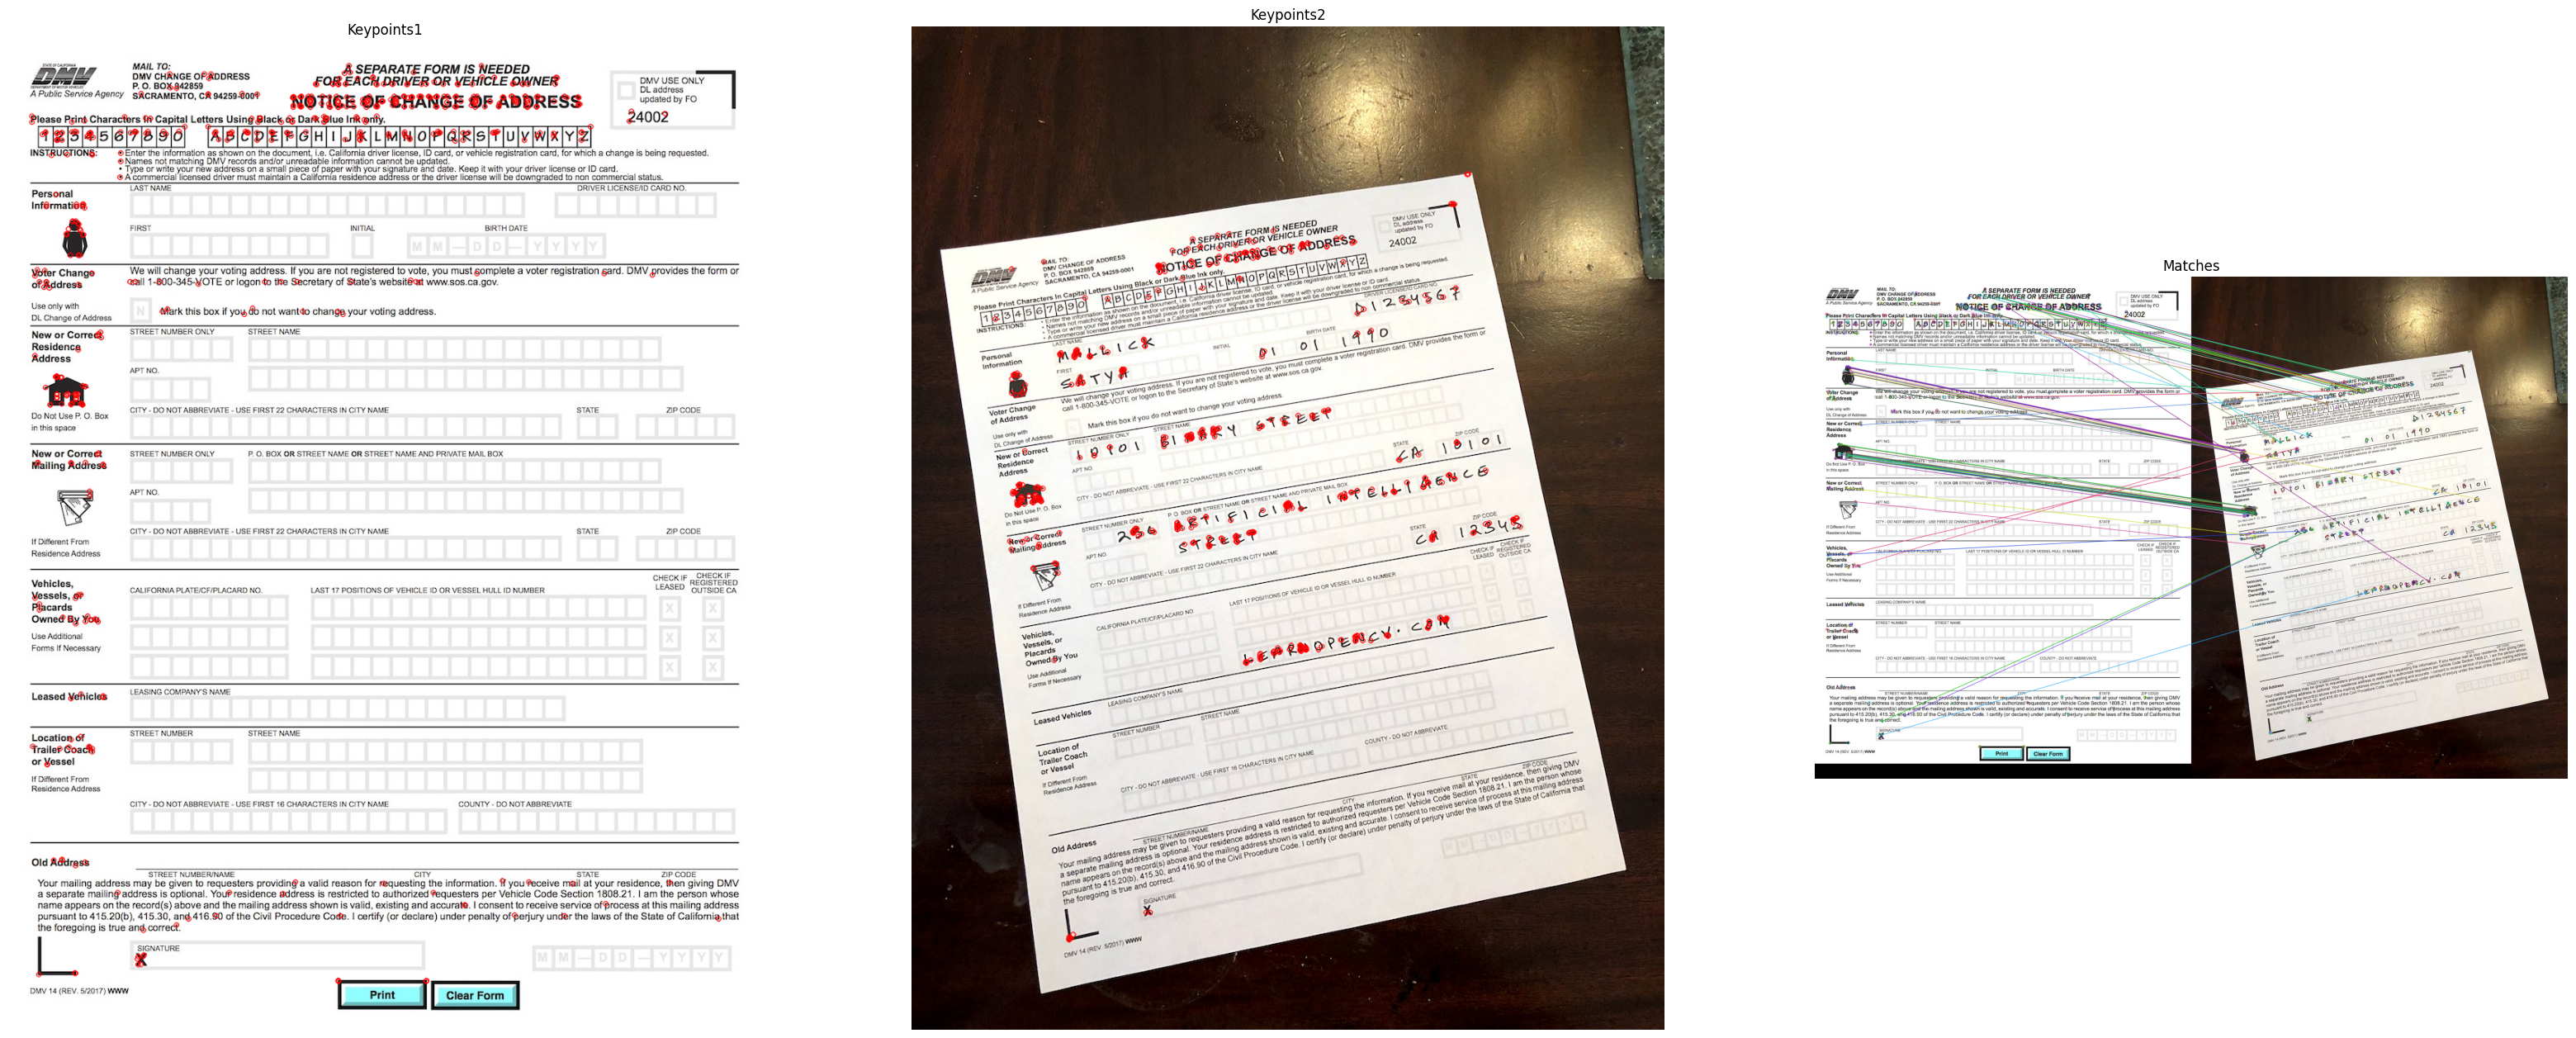

In [14]:
img1Gray = cv2.cvtColor(templateImg, cv2.COLOR_BGR2GRAY)
img2Gray = cv2.cvtColor(scanImg, cv2.COLOR_BGR2GRAY)

maxNFeatures = 500
orb = cv2.ORB_create(maxNFeatures)
keypoints1, descriptors1 = orb.detectAndCompute(img1Gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2Gray, None)

img2show1 = cv2.drawKeypoints(templateImg, color=(255, 0, 0), keypoints=keypoints1, outImage=None)
img2show2 = cv2.drawKeypoints(scanImg, color=(255, 0, 0), keypoints=keypoints2, outImage=None)

matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)
matches = sorted(matches, key=lambda x: x.distance)
nGoodMatches = int(len(matches) * 0.15)
matches = matches[:nGoodMatches]
img2show_matches = cv2.drawMatches(templateImg, keypoints1, scanImg, keypoints2, matches, outImg=None)

plt.figure(figsize=(40, 30))
plt.subplot(1, 3, 1)
plt.imshow(img2show1)
plt.title("Keypoints1")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(img2show2)
plt.title("Keypoints2")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(img2show_matches)
plt.title("Matches")
plt.axis("off")
plt.show()



In [16]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)
print(h)

[[ 1.38978389e+00 -2.06275423e-01 -3.90533604e+00]
 [ 2.19290790e-01  1.51931294e+00 -4.79925240e+02]
 [-7.14988187e-05  1.31073141e-04  1.00000000e+00]]


Text(0.5, 1.0, 'Warped Image')

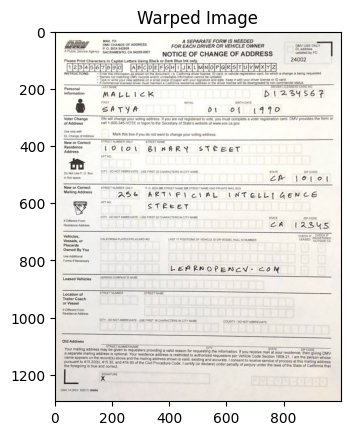

In [17]:
warpedImg = cv2.warpPerspective(scanImg, h, (templateImg.shape[1], templateImg.shape[0]))
plt.imshow(warpedImg)
plt.title("Warped Image")